In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import StratifiedKFold
from sklearn import ensemble
import xgboost as xgb
from sklearn.metrics import mean_squared_error 

**Import Dataset**

In [2]:
df =pd.read_csv ('/home/jovyan/Onlineshoppersdata(1).csv')

# <font color='red'>**Classification Algortihms with imbalanced dataset**</font>

## **Random Forest**

### **Separate the data into Train and Test**

In [3]:
x = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

x_trainrf, x_testrf, y_trainrf, y_testrf = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
forest  = RandomForestClassifier()
 
forest.fit(x_trainrf,y_trainrf)

y_predrf =forest.predict(x_testrf)

In [5]:
accuracy_forest = (metrics.accuracy_score(y_testrf,y_predrf)*100)
print('Acurracy is ', str(round(accuracy_forest,2)))

Acurracy is  89.13


In [6]:
rmse = np.sqrt(mean_squared_error(y_testrf, y_predrf))
print("RMSE (root-mean-square error): %f" % (rmse))

RMSE (root-mean-square error): 0.329663


In [7]:
# View confusion matrix for test data and predictions
matrix_rf = confusion_matrix(y_testrf, y_predrf)
print(matrix_rf )

[[1982   73]
 [ 195  216]]


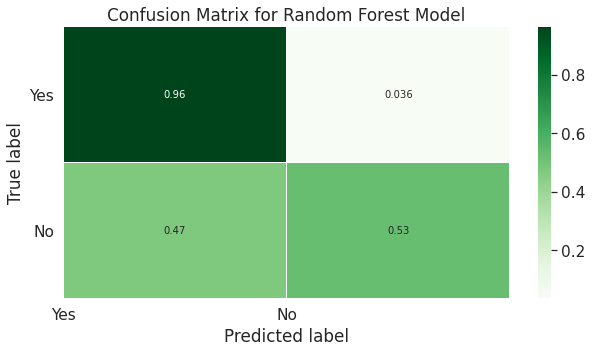

In [8]:
# Get and reshape confusion matrix data

matrix_rforest = matrix_rf.astype('float') / matrix_rf.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix_rforest, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Yes', 'No']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0,)
plt.yticks(tick_marks2, class_names, rotation=0,  )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig('output14.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# View the classification report for test data and predictions
print(classification_report(y_testrf, y_predrf))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.75      0.53      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



## **K-Fold Cross Validation for Random Forest**

In [34]:
X = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

model= RandomForestClassifier()
kf = KFold(n_splits=10,random_state=42,shuffle=True)
kf.get_n_splits(X)
i=1
print("confusion matrix:")
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]

    y_train, y_test_kfold = y[train_index], y[test_index]

    model.fit(X_train, y_train)
 

    print (i,"\n",confusion_matrix(y_test, model.predict(X_test)))
    i=i+1
    print(10* '#')

confusion matrix:
1 
 [[925 124]
 [154  30]]
##########
2 
 [[930 119]
 [151  33]]
##########
3 
 [[928 121]
 [160  24]]
##########
4 
 [[931 118]
 [162  22]]
##########
5 
 [[932 117]
 [161  23]]
##########
6 
 [[928 121]
 [165  19]]
##########
7 
 [[933 116]
 [153  31]]
##########
8 
 [[908 141]
 [159  25]]
##########
9 
 [[929 120]
 [151  33]]
##########
10 
 [[1011   38]
 [  91   93]]
##########


In [35]:
y_pred_kfold=model.predict(X_test)

In [36]:
# View the classification report for test data and predictions
print(classification_report(y_test_kfold, y_pred_kfold))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1049
           1       0.71      0.51      0.59       184

    accuracy                           0.90      1233
   macro avg       0.81      0.73      0.77      1233
weighted avg       0.89      0.90      0.89      1233



In [37]:
scores = cross_val_score(model, X, y, cv=kf)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.01


> <font color='blue'>**After applying K-fold to Random Forest we can observe that the average score remains at 90%**</font>

## **XGBoost**

In [14]:
x = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

data_dmatrix = xgb.DMatrix(data=x,label=y)
X_trainxg, X_testxg, y_trainxg, y_testxg = train_test_split(x, y, test_size=0.2, random_state=42)

xg_model = xgb.XGBClassifier()
print(xg_model)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)


In [15]:
xg_model.fit(X_trainxg,y_trainxg)

preds_xg = xg_model.predict(X_testxg)# make predictions for test data

predictions = [round(value) for value in preds_xg]


[17:27:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [16]:
accuracy_xg = (metrics.accuracy_score(y_testxg,preds_xg)*100)
print('Acurracy is ', str(round(accuracy_forest,2)))

Acurracy is  89.13


In [17]:
rmse = np.sqrt(mean_squared_error(y_testxg, preds_xg))
print("RMSE (root-mean-square error): %f" % (rmse))

RMSE (root-mean-square error): 0.338165


In [18]:
# View confusion matrix for test data and predictions
matrix_xgboost=confusion_matrix(y_testxg, preds_xg)
print(matrix_xgboost)

[[1958   97]
 [ 185  226]]


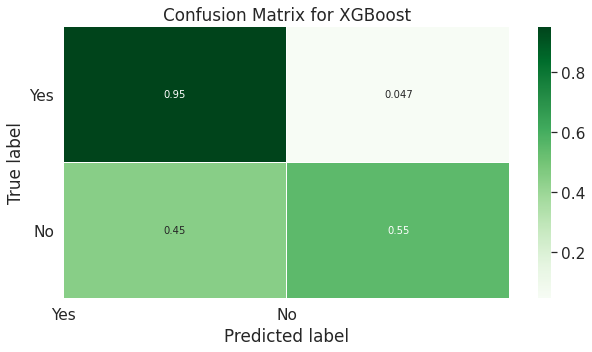

In [19]:
# Get and reshape confusion matrix data
matrix_xg = matrix_xgboost.astype('float') / matrix_xgboost.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix_xg, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Yes', 'No']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0,)
plt.yticks(tick_marks2, class_names, rotation=0,  )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost')
plt.savefig('output15.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
print(classification_report(y_testxg, preds_xg))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.70      0.55      0.62       411

    accuracy                           0.89      2466
   macro avg       0.81      0.75      0.77      2466
weighted avg       0.88      0.89      0.88      2466



## **XGBoost Model With k-Fold Cross Validation**

> **Using Kfold**

In [40]:
x = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

# CV model
modelxg = xgb.XGBClassifier()
kf = KFold(n_splits=10,random_state=42,shuffle=True)
kf.get_n_splits(X)
i=1
print("confusion matrix:")
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]

    y_train, y_test_xg = y[train_index], y[test_index]

    modelxg.fit(X_train, y_train)
 

    print (i,"\n",confusion_matrix(y_test, model.predict(X_test)))
    i=i+1
    print(10* '#')

confusion matrix:
[17:45:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1 
 [[880 169]
 [150  34]]
##########
[17:45:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


2 
 [[881 168]
 [144  40]]
##########
[17:45:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


3 
 [[910 139]
 [159  25]]
##########
[17:45:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


4 
 [[890 159]
 [156  28]]
##########
[17:45:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


5 
 [[895 154]
 [157  27]]
##########
[17:45:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


6 
 [[879 170]
 [160  24]]
##########
[17:45:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


7 
 [[895 154]
 [152  32]]
##########
[17:45:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


8 
 [[879 170]
 [151  33]]
##########
[17:45:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


9 
 [[892 157]
 [144  40]]
##########
[17:45:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


10 
 [[1011   38]
 [  91   93]]
##########


In [45]:
y_pred_xg=modelxg.predict(X_test)
print(classification_report(y_test_xg, y_pred_xg))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1049
           1       0.70      0.57      0.63       184

    accuracy                           0.90      1233
   macro avg       0.81      0.76      0.79      1233
weighted avg       0.89      0.90      0.90      1233



In [50]:
results = cross_val_score(modelxg, X, y, cv=kf)
print("%0.2f accuracy with a standard deviation of %0.2f" % (results.mean()*100, results.std()*100))

[17:50:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

> <font color='blue'>**After applying K-fold to the XGBoost model we can observe that the average score remains at 88-89%**</font>